#Correlation between the price and greenhouse gas emissions of a product

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import statistics as stc
import seaborn as sns

In [0]:
df = pd.read_excel('dataset.xlsx', names=['label', 'class', 'production_emission_1_pound', 'production_emission_5_pound', 'transportation_emission_1_pound_100_miles', 'total_emission', 'price_1_pound'], header=None) 
product_class = ['beans', 'dairy', 'fruits', 'grains', 'meat', 'crops', 'nuts', 'oils', 'processed', 'seafoods','vegetables']
df = df.drop("label", axis=1)
df = df.drop("production_emission_1_pound", axis=1)
df = df.drop("production_emission_5_pound", axis=1)
df = df.drop("transportation_emission_1_pound_100_miles", axis=1)
df = df.iloc[1:]

In [0]:
def linear_regression(x, y ):
    model = LinearRegression(fit_intercept=True)
    model.fit(x.reshape(-1, 1), y)
    y_pred = model.predict(x.reshape(-1, 1))
    y_pred_lin_formula = model.coef_[0] * x_regression
    y_pred_lin_formula_str = str(round(model.coef_[0], 3)) + "*x"

In [0]:
def polynomial_regression(x, y, d):
    polynomial_features= PolynomialFeatures(degree=d)
    x_poly = polynomial_features.fit_transform(x.reshape(-1, 1))
    model.fit(x_poly,  y)
    y_poly_pred = model.predict(x_poly)
    y_pred_pol_formula = model.coef_[0] + model.coef_[1] * x_regression + model.coef_[2] * x_regression**2
    y_pred_pol_formula_str = str(round(model.coef_[0], 3)) + " + " + str(round(model.coef_[1], 3)) +"*x + " + str(round(model.coef_[2], 3)) +"*x²"

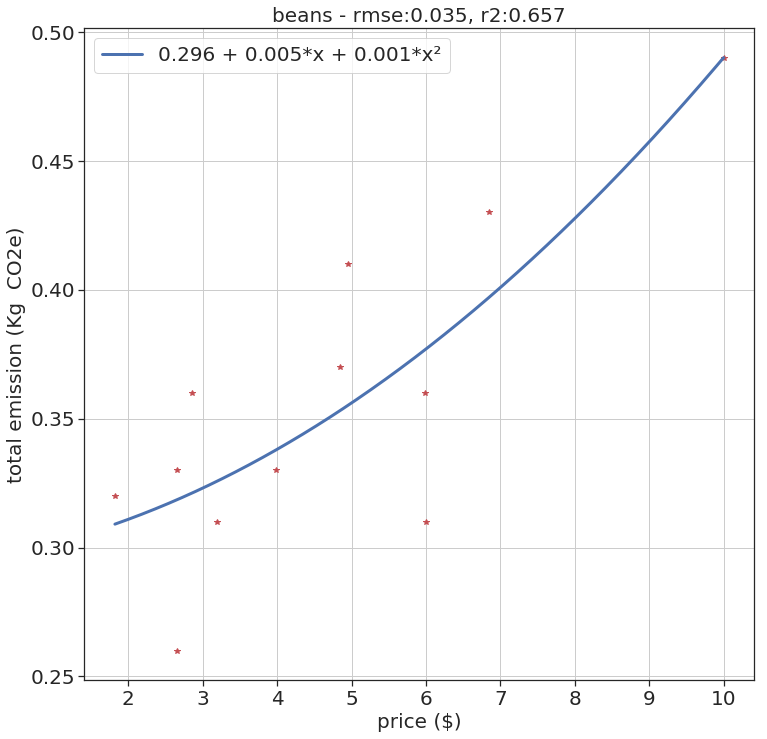

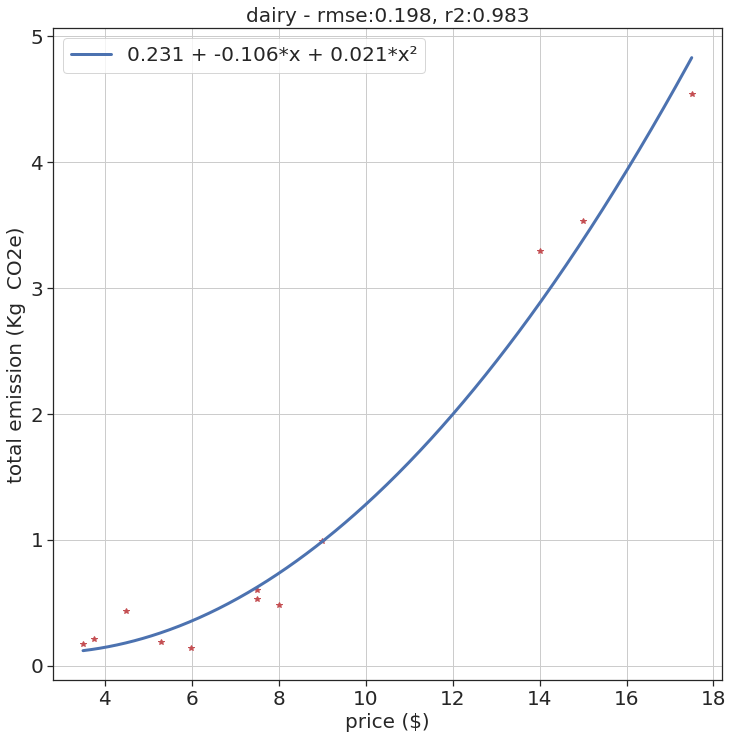

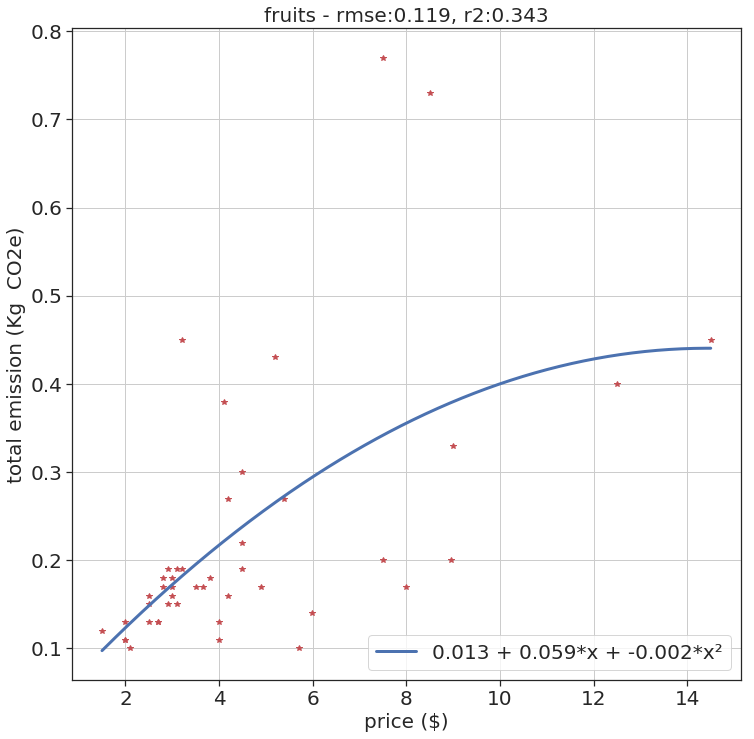

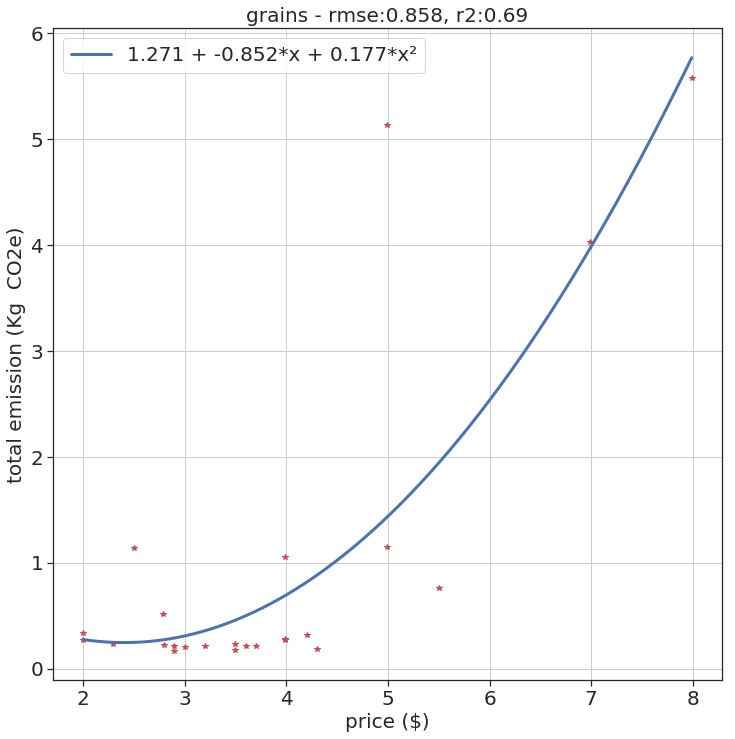

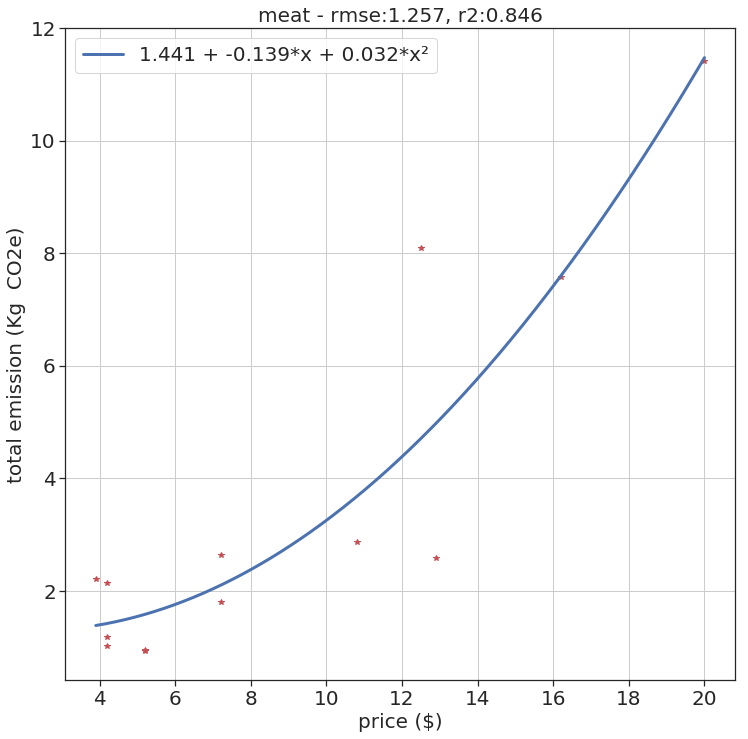

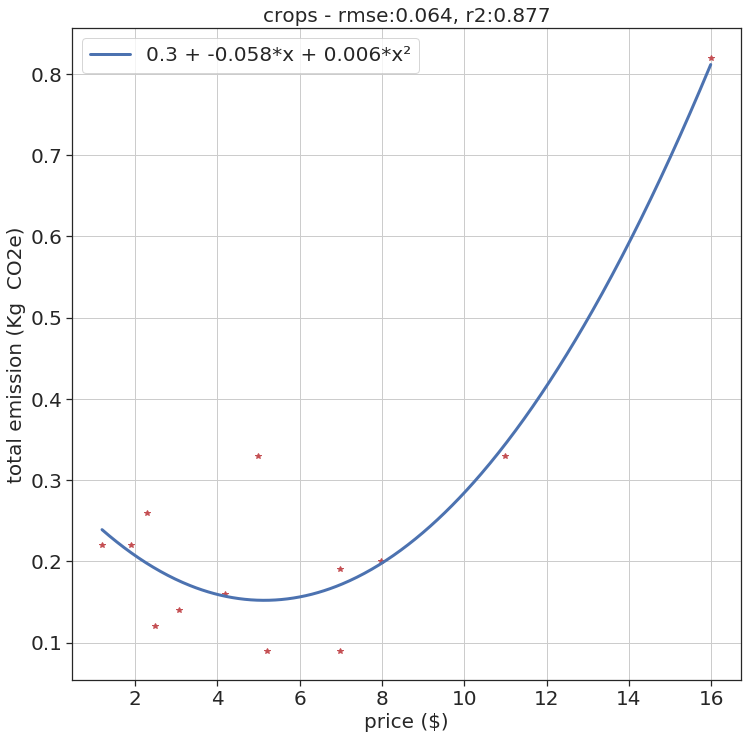

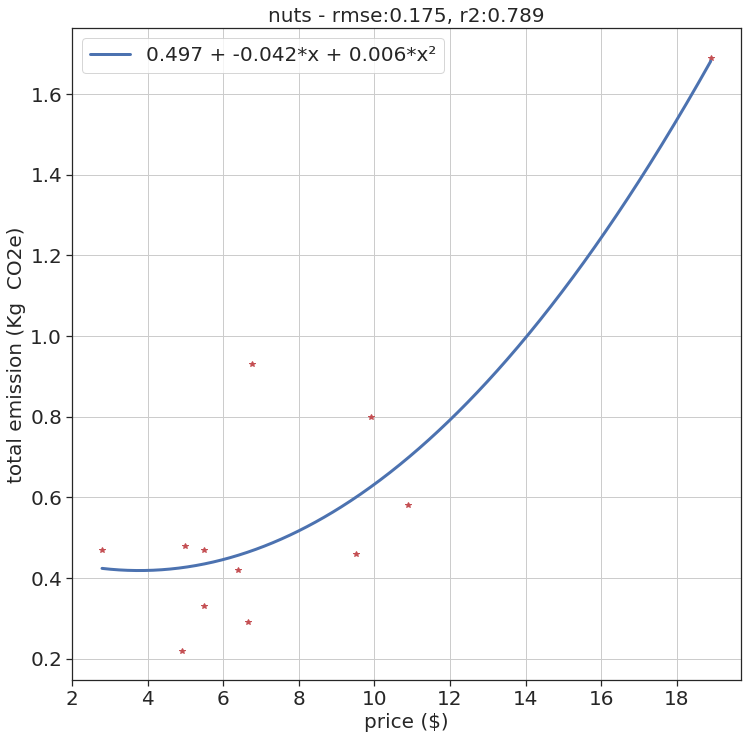

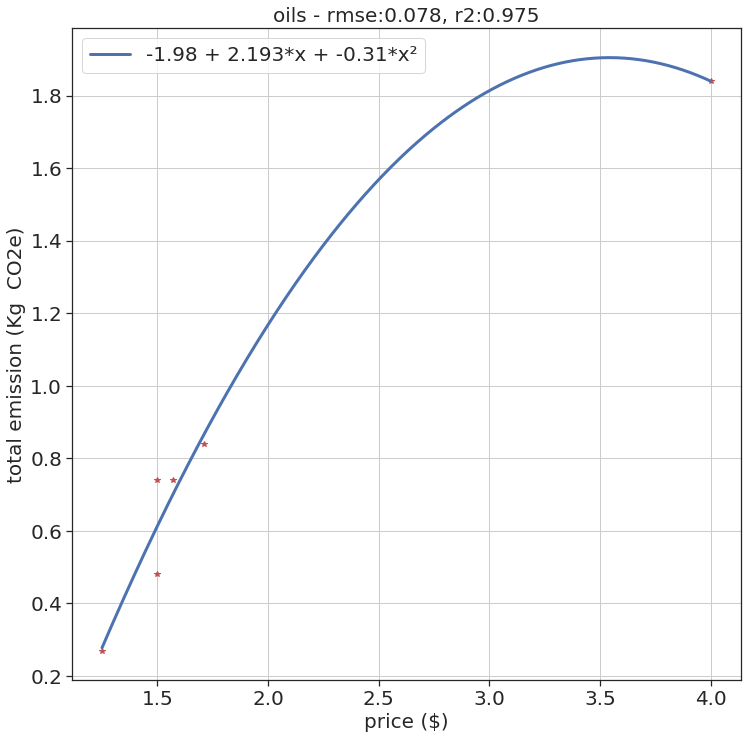

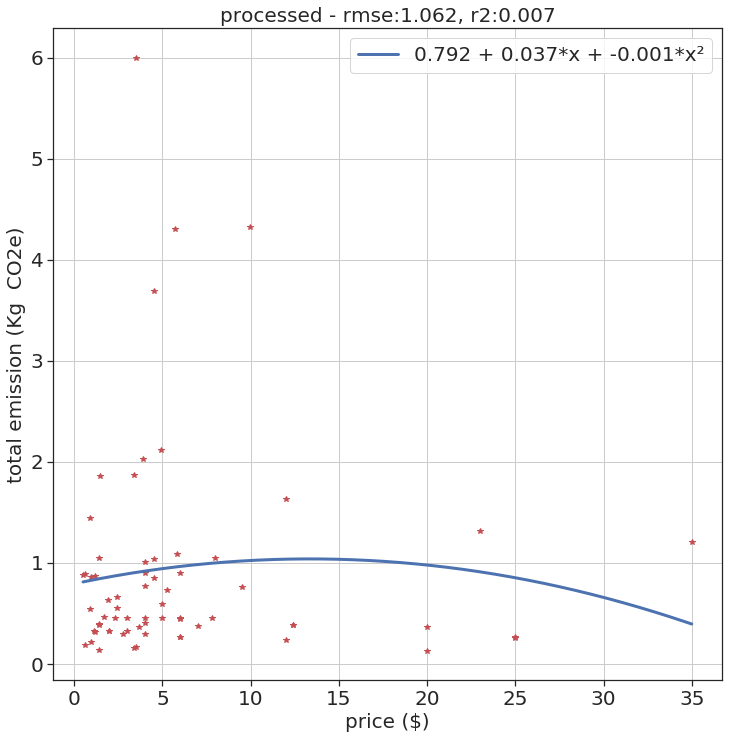

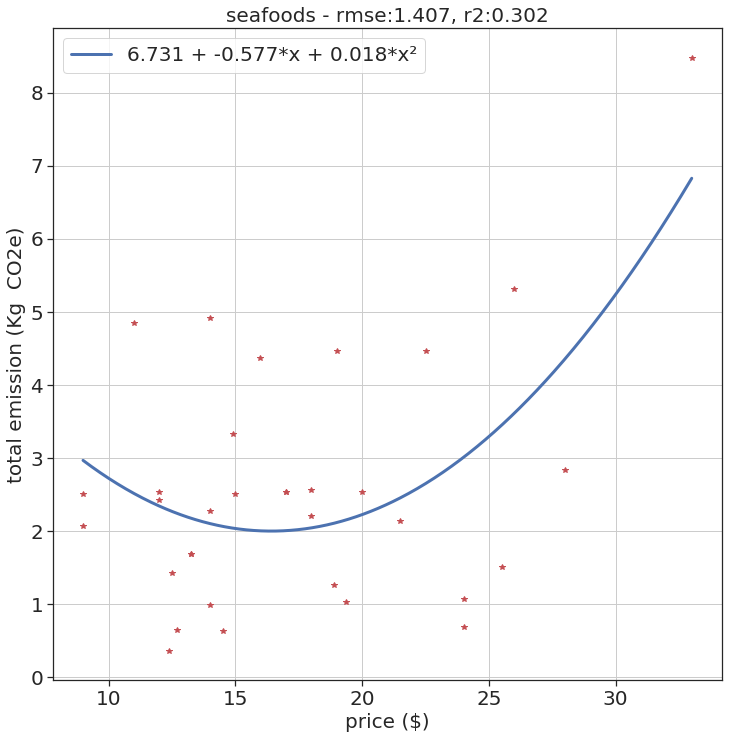

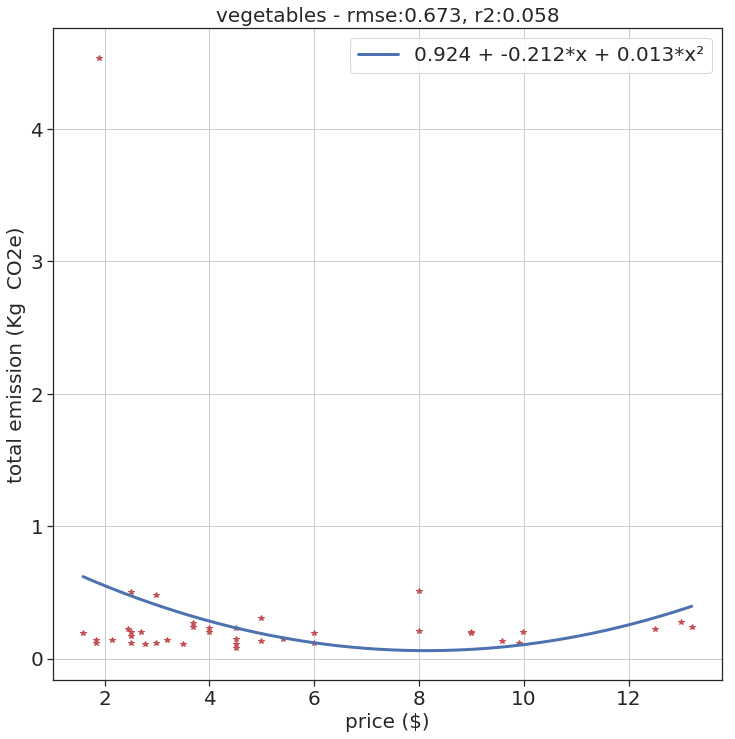

In [0]:
product_list_cat = []
regression_coef = []

for product in product_class:  
    
    # Classify each product
    total_emission_list = []
    price_list = []
    
    for index, row in df.iterrows():
        if row['class'] == product:
            total_emission_list.append(row['total_emission'])
            price_list.append(row['price_1_pound'])
      
    product_df = {
        "class": product,
        "price":  np.array(price_list),
        "total_emission": np.array(total_emission_list)
    }
    
    product_list_cat.append(product_df)
    x_regression = np.linspace(np.amin(np.array(price_list)), np.amax(np.array(price_list)), num=500)

    
    
    # Linear regression
    model = LinearRegression(fit_intercept=False)
    model.fit(product_df['price'].reshape(-1, 1), product_df['total_emission'])
    y_pred = model.predict(product_df['price'].reshape(-1, 1))
    
    y_pred_lin_formula = model.coef_[0] * x_regression
    y_pred_lin_formula_str = str(round(model.coef_[0], 3)) + "*x"
    
    # Polynomial regression
    polynomial_features= PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(product_df['price'].reshape(-1, 1))
    model.fit(x_poly,  product_df['total_emission'])
    y_poly_pred = model.predict(x_poly)
    
    y_pred_pol_formula = model.coef_[0] + model.coef_[1] * x_regression + model.coef_[2] * x_regression**2
    y_pred_pol_formula_str = str(round(model.coef_[0], 3)) + " + " + str(round(model.coef_[1], 3)) +"*x + " + str(round(model.coef_[2], 3)) +"*x²"
    regression_coef.append([model.coef_[0], model.coef_[1], model.coef_[2]])
    
    # evaluating the model 
    rmse = np.sqrt(mean_squared_error(product_df['total_emission'], y_poly_pred))
    r2 = r2_score(product_df['total_emission'], y_poly_pred)
    
    
    # Make a plot for each class of product    
    plt.figure(figsize=(12,12))
    plt.rcParams["lines.linewidth"] = 3
    plt.plot(product_df['price'], product_df['total_emission'], 'r*')
    #plt.plot(product_df['price'], y_pred, color='b', label="f")
    
    #plt.plot(x_regression, y_pred_lin_formula, color='m', label=y_pred_lin_formula_str)
    #plt.plot(product_df['price'], y_poly_pred, color='c', label="f²")
    plt.plot(x_regression, y_pred_pol_formula, color='b', label=y_pred_pol_formula_str)
    plt.grid(True)
    plt.ylabel('total emission (Kg  CO2e)', fontsize = 20)
    plt.xlabel('price ($)', fontsize = 20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.legend(loc=0, fontsize = 20)
    plt.title(product+" - rmse:"+str(round(rmse, 3))+", r2:"+str(round(r2, 3)), fontsize = 20)


    

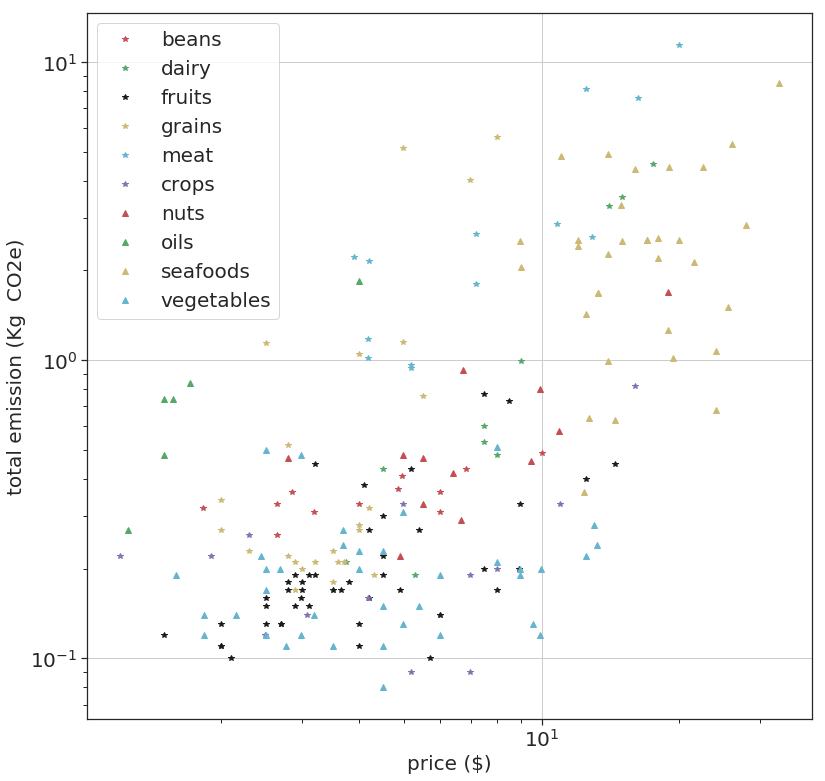

In [0]:
product_list_cat = np.array(product_list_cat)
plot_icon = ["r*", 'g*', 'k*', 'y*', 'c*', 'm*', "r^", 'g^', 'b^', 'y^', 'c^', 'm^']
plt.figure(figsize=(13,13))
for index, cat in enumerate(product_list_cat):
    if cat['class'] != 'processed':
        plt.loglog(cat['price'], cat['total_emission'], plot_icon[index], label=cat['class'])
plt.grid(True)
plt.ylabel('total emission (Kg  CO2e)', fontsize = 20)
plt.xlabel('price ($)', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc=0, fontsize = 20)
plt.show()

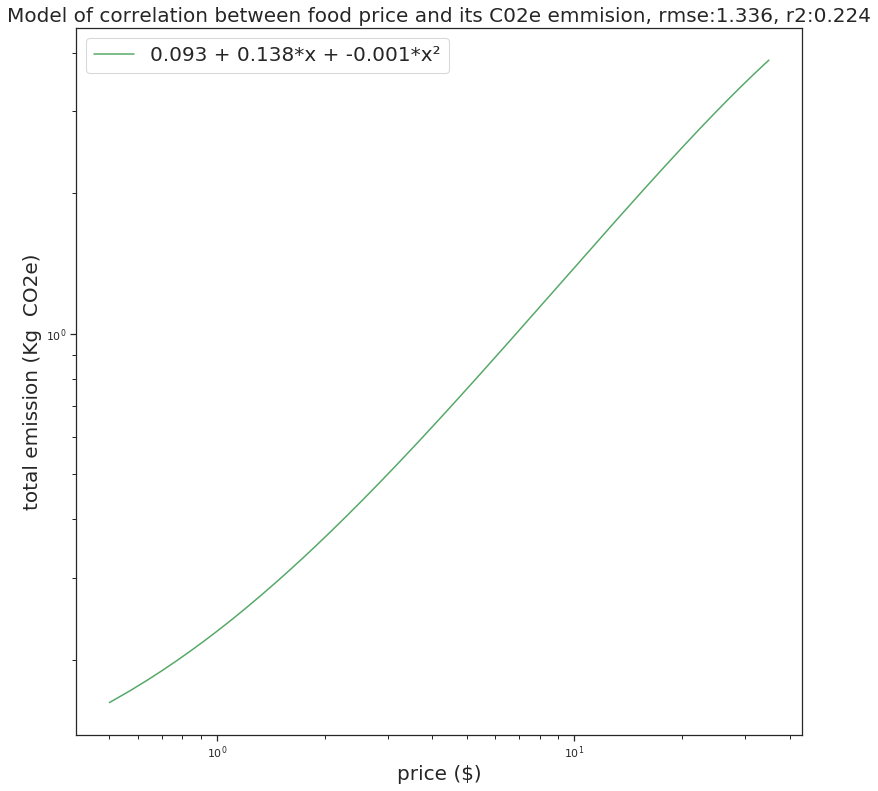

In [0]:

x_regression = np.linspace(np.amin(np.array(df["price_1_pound"])), np.amax(np.array(df["price_1_pound"])), num=500)
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(np.array(df["price_1_pound"]).reshape(-1, 1))
model.fit(x_poly,  df["total_emission"])
y_poly_pred = model.predict(x_poly)
y_pred_pol_formula = model.coef_[0] + model.coef_[1] * x_regression + model.coef_[2] * x_regression**2
y_pred_pol_formula_str = str(round(model.coef_[0], 3)) + " + " + str(round(model.coef_[1], 3)) +"*x + " + str(round(model.coef_[2], 3)) +"*x²"
y_pred_pol_formula = model.coef_[0] + model.coef_[1] * x_regression + model.coef_[2] * x_regression**2
y_pred_pol_formula_str = str(round(model.coef_[0], 3)) + " + " + str(round(model.coef_[1], 3)) +"*x + " + str(round(model.coef_[2], 3)) +"*x²"
polynomial_regression(np.array(df["price_1_pound"]),  df["total_emission"], 2)

rmse = np.sqrt(mean_squared_error(df['total_emission'], y_poly_pred))
r2 = r2_score(df['total_emission'], y_poly_pred)
plt.figure(figsize=(13,13))
plt.ylabel('total emission (Kg  CO2e)', fontsize = 20)
plt.xlabel('price ($)', fontsize = 20)
plt.title("Model of correlation between food price and its C02e emmision, rmse:"+str(round(rmse, 3))+", r2:"+str(round(r2, 3)), fontsize = 20)
plt.loglog(x_regression, y_pred_pol_formula, color='g', label=y_pred_pol_formula_str)
plt.legend(loc=0, fontsize = 20)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


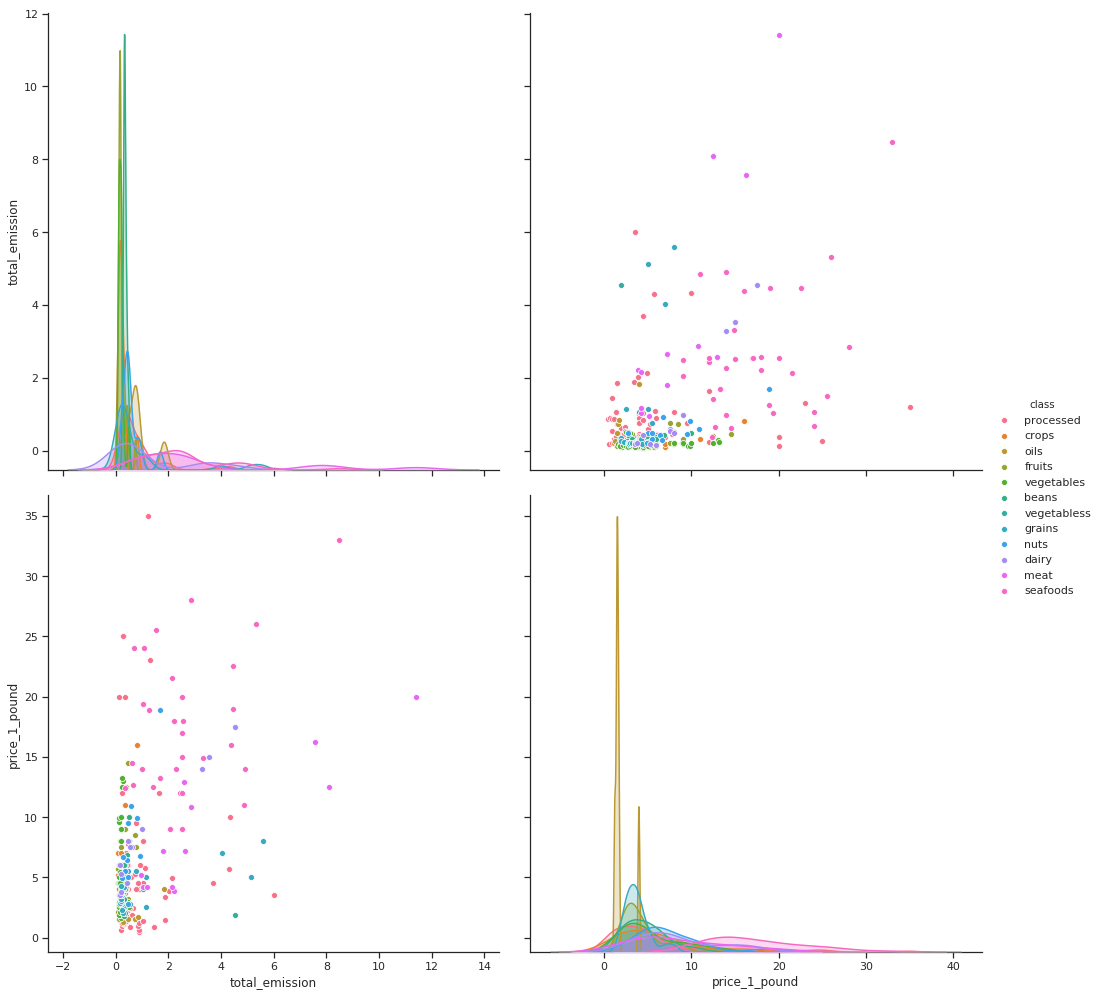

In [0]:
222sns.set(style="ticks")
sns.pairplot(df, hue="class", height=7)